# Analysis of Top 50 U.S. Fast Food Companies

For today's project, we will be using data about fast food restaurants across the U.S. The dataset has been provided to you as a .csv file in the downloaded project materials. 

Follow along by reading through each step and completing sections labeled "__TO_DO__"

If you need any help, don't hesistate to reach out in the queue!

#### As you work through the project, make sure to run any code cells, whether or not there are "#__TO_DO__#" sections inside the cells:

>(Hint: when you run the cell below successfully, you should see the output of the print function listed below the cell)

In [1]:
print("Yay, you ran this cell!")

Yay, you ran this cell!


## Step 1: Define a Question or Set of Questions

For today's project, we will be using data about fast food restaurants across the U.S. 

Imagine you are an entrepreneur who wants to open a fast food franchise. Using the data available to you, you want to answer the following questions:

#### 1) What is the distribution of revenue of all companies? 
#### 2) What is the distribution of the number of units for the companies overall?
#### 3) Which companies have the most franchise units (non-company-owned units)?
#### 4) Which companies have the most locations combined (franchise + company owned)?¶
#### 5) Which companies have the highest revenue per unit?
#### 6) Is there a correlation between the amount of sales per company and the company's total number of locations?


These are simple questions. In data analysis, they are known as exploratotry questions. As you move further in your data analytics journey, you'll gain the skills to answer more complex questions and tackle larger problems such as predicting future revenue for a company. 

## Step 2: Set Initial Requirements & Gather Data

In this step, initial project outlines will be set such as timelines and objectives. In addition, you'd look for potential data sources to answer your questions. For student data projects, there are many free resources such as kaggle.com or the Google dataset search. In a future career, this might be proprietary company data such as sales and revenue information or consumer information being gathered from website analytic tools. 

For our project today, we will use a small dataset with information on the franchise units and sales information on the top 50 fast food restaurants in the U.S. 

#### To load the dataset, we will use a python library called Pandas. 
Pandas is one of the main tools used by data analysts to work with data. As you work through this lab, complete the # __TO_DO__ sections as directed. 

To run cells in Jupyter notebook, simply press SHIFT + ENTER. 

In [2]:
# press SHIFT+ENTER to run this cell. 
# this imports libraries we will use for data manipulation and visualization

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline

In [3]:
# to load the data, we will use a pandas method called "read_csv" - 
# this will convert the csv file into a "dataframe" which we will save to a variable called "df" for reference

#__TO_DO__ below:

# locate the .csv file from your downloaded materials for this lab. Right-click the file and select "copy as path." 

# paste the path to the file on your computer in the parenthesis below (format should be (r"path") - 
# in python, writing r before a string is called a raw string, which will ensure non-letter characters won't escape the string)

df = pd.read_csv(r"/Users/brianwilliams/foundations/week5/Thursday/spec-trial-data/top_50_fast_food_messy.csv")

# after pasting the path in the TO_DO section above, run this cell by pressing SHIFT + ENTER

Before we clean the data, we want to take an initial look at it. 

There are several methods in pandas we can use to get an initial feel for the data. Some methods include:

<ul>
    <li>head - looks at the beginning values in the dataframe </li>
    <li>tail - looks at the ending values in the dataframe </li> 
    <li>info - shows basic information in the dataframe including column names, data types, number of rows, etc.</li>
</ul>


To invoke a method, call the variable (saved earlier as df), then use a "." followed by the method name invoked. 

For example:

In [4]:
df.head()

,Company,Category,salesInMillions 2019,salesPerUnitInThousands 2019,franchisedUnits 2019,companyOwnedUnits 2019,totalUnits 2019,unitChangeFrom 2018
0,Mcdonald's,burger,"40,413","2,912","13,154",692,"13,846",-66
1,Starbucks,snack,"21,550","1,454","6,768","8,273","15,041",216
2,Chick-Fil-A,chicken,"11,000","4,517","2,500",NaN,"2,500",130
3,Taco Bell,global,"11,000","1,502","6,622",467,"7,089",181
4,Burger King,burger,"10,300","1,399","7,294",52,"7,346",16


In [5]:
# look at the last values in the dataframe by typing the variable name (df)

df.tail()

,Company,Category,salesInMillions 2019,salesPerUnitInThousands 2019,franchisedUnits 2019,companyOwnedUnits 2019,totalUnits 2019,unitChangeFrom 2018
45,Shake Shack,burger,630,"4,214",22,163,185,59
46,Marcos Pizza,pizza,628,726,875,40,915,32
47,Baskin Robbins,snack,626,247,"2,524",NaN,"2,524",-26
48,Tropical Smoothie Café,snack,577,769,833,1,834,115
49,Auntie Anne's,snack,563,562,"1,200",11,"1,211",-20


In [6]:
# look at the basic information about a dataframe including column names, data types, and number of rows

df.info

<bound method DataFrame.info of                    Company  Category salesInMillions 2019  \
0               Mcdonald's    burger               40,413   
1                Starbucks     snack               21,550   
2              Chick-Fil-A   chicken               11,000   
3                Taco Bell    global               11,000   
4              Burger King    burger               10,300   
5                   Subway  sandwich               10,000   
6                  Wendy's    burger                9,865   
7                  Dunkin'     snack                9,220   
8                  Dominos     pizza                7,100   
9             Panera Bread  sandwich                5,925   
10                Chipotle    global                5,520   
11               Pizza Hut     pizza                5,380   
12                     KFC   chicken                4,820   
13         Sonic Drive In     burger                4,687   
14                  Arby's  sandwich                3

#### You probably noticed some of these column names are messy. 

There are other issues too, which we will find in the data preparation phase during step 3. We are missing values, column names are hard to read, and the data types of most of the columns are "objects" instead of numbers (floats or integers). This is a reality of data analysis. In fact, in the industry it is widely acknowledged that up to 80% of a data analysis project is spent cleaning and preparing the data! 

#### Now that we've taken an initial look at the dataframe, we have some things to clean up before we analyze it. 

## Step 3: Prepare the Data

#### To prepare the data, we need to "clean" it. 
Cleaning data is just making it more usable and easier to work with as we analyze it. 

We will tackle the column names first. Follow along with the cells below to clean the columns up. 

In [7]:
# Use the info method on the dataframe again. You'll see the column names have capital letters, no spaces, and punctuation.

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 8 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   Company                       50 non-null     object
 1   Category                      50 non-null     object
 2   salesInMillions 2019          50 non-null     object
 3   salesPerUnitInThousands 2019  50 non-null     object
 4   franchisedUnits 2019          48 non-null     object
 5   companyOwnedUnits 2019        46 non-null     object
 6   totalUnits 2019               50 non-null     object
 7   unitChangeFrom 2018           50 non-null     int64 
dtypes: int64(1), object(7)
memory usage: 3.2+ KB


#### Next, we can use a python function to remove punctuation and add underscores where there should be spaces.

In [8]:
# press SHIFT + ENTER to run this cell

column_list = df.columns.tolist()

import re 

snake_list = []

for column in column_list:
    column = re.sub(r'(?<!^)(?=[A-Z])', '_', column).lower()
    
    snake_list.append(column)

df.columns = snake_list
df.columns = df.columns.str.replace(' ', '_')

Don't worry if you don't understand everything in this function. That's what you'll be learning in the specialization! 

In [9]:
# use the info method on the dataframe again and see how the column names changed
# press SHIFT + ENTER to run this cell

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 8 columns):
 #   Column                            Non-Null Count  Dtype 
---  ------                            --------------  ----- 
 0   company                           50 non-null     object
 1   category                          50 non-null     object
 2   sales_in_millions_2019            50 non-null     object
 3   sales_per_unit_in_thousands_2019  50 non-null     object
 4   franchised_units_2019             48 non-null     object
 5   company_owned_units_2019          46 non-null     object
 6   total_units_2019                  50 non-null     object
 7   unit_change_from_2018             50 non-null     int64 
dtypes: int64(1), object(7)
memory usage: 3.2+ KB


#### Look at the "Dtype" column on the right side of the information displayed above. 

This shows the data type of each column in the dataframe. In pandas, "object" refers to a string. The problem is, we want the columns with numbers to be actual numbers, not strings, so we can perform calculations on them.

In [10]:
# use the head method on the dataframe to see the first few rows. 

df.head()

,company,category,sales_in_millions_2019,sales_per_unit_in_thousands_2019,franchised_units_2019,company_owned_units_2019,total_units_2019,unit_change_from_2018
0,Mcdonald's,burger,"40,413","2,912","13,154",692,"13,846",-66
1,Starbucks,snack,"21,550","1,454","6,768","8,273","15,041",216
2,Chick-Fil-A,chicken,"11,000","4,517","2,500",NaN,"2,500",130
3,Taco Bell,global,"11,000","1,502","6,622",467,"7,089",181
4,Burger King,burger,"10,300","1,399","7,294",52,"7,346",16


Before we convert the strings into numbers, we need to remove the commas.

In [11]:
# press SHIFT + ENTER to run this cell
# below, we are reassigning the values in the "sales_in_millions_2019" column to the same values with the commas removed.

df.sales_in_millions_2019 = df.sales_in_millions_2019.str.replace(',', '')

We'll have to go through and remove commas from each of the columns that we want to change into numbers. Use the cell above as a guide and fill in the "#_TO_DO_#" sections. 

To understand more of what we are doing with python to accomplish this, check out these links. 

Replace method in python:
https://www.w3schools.com/python/ref_string_replace.asp
https://www.tutorialspoint.com/python/string_replace.htm

In [13]:
# remove commas from the sales per unit column values

df.sales_per_unit_in_thousands_2019 = df.sales_per_unit_in_thousands_2019.str.replace(',', '')

In [14]:
# remove commas from the franchised units column values

df.franchised_units_2019 = df.franchised_units_2019.str.replace(',', '')

In [15]:
# remove commas from the company owned units column values

df.company_owned_units_2019 = df.company_owned_units_2019.str.replace(',', '')

In [16]:
# remove commas from the total units column values

df.total_units_2019 =  df.total_units_2019.str.replace(',', '')

In [17]:
# check the first few values in your dataframe to see if commas were taken out successfully

df.head()

,company,category,sales_in_millions_2019,sales_per_unit_in_thousands_2019,franchised_units_2019,company_owned_units_2019,total_units_2019,unit_change_from_2018
0,Mcdonald's,burger,40413,2912,13154,692,13846,-66
1,Starbucks,snack,21550,1454,6768,8273,15041,216
2,Chick-Fil-A,chicken,11000,4517,2500,NaN,2500,130
3,Taco Bell,global,11000,1502,6622,467,7089,181
4,Burger King,burger,10300,1399,7294,52,7346,16


Uh oh! We ran into another problem. If you look in the third row under the "company_owned_units_2019" column, you'll see a value listed as "NaN." This stands for "not a number." We won't be able to convert these columns to numbers as long as there are NaN values in the columns. This is a common problem for data analysts to need to solve. There are many ways to fill in blank values or missing fields in datasets, which you'll learn about as you move further in the specialization. 

For now, we will use the simplest method of replacing NaN fields with 0. Run the cells below to fix the NaN issues in our dataframe.

In [18]:
# press SHIFT+ENTER to run this cell. First we'll take a look at any rows with NaN values.
df[df.isna().any(axis=1)]

,company,category,sales_in_millions_2019,sales_per_unit_in_thousands_2019,franchised_units_2019,company_owned_units_2019,total_units_2019,unit_change_from_2018
2,Chick-Fil-A,chicken,11000,4517,2500,NaN,2500,130
7,Dunkin',snack,9220,968,9630,NaN,9630,42
10,Chipotle,global,5520,2195,NaN,2580,2580,130
32,In-N-Out Burger,burger,1000,2882,NaN,354,354,14
39,Tim Horton's,sandwich,840,1165,715,NaN,715,-12
47,Baskin Robbins,snack,626,247,2524,NaN,2524,-26


In [19]:
# press SHIFT+ENTER to run this cell - now we will fill the NaN values with zero

df.fillna(value=0, inplace=True)

In [20]:
# use the .head() method on the data frame to see if we fixed the NaN values

df.head()

,company,category,sales_in_millions_2019,sales_per_unit_in_thousands_2019,franchised_units_2019,company_owned_units_2019,total_units_2019,unit_change_from_2018
0,Mcdonald's,burger,40413,2912,13154,692,13846,-66
1,Starbucks,snack,21550,1454,6768,8273,15041,216
2,Chick-Fil-A,chicken,11000,4517,2500,0,2500,130
3,Taco Bell,global,11000,1502,6622,467,7089,181
4,Burger King,burger,10300,1399,7294,52,7346,16


Check the third row under company_owned_units - The value should now be 0. Simple, easy fix! 

If you'd like to learn more about the Pandas fillna method, click here - https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.fillna.html

Now that we fixed our NaN values, we're ready to convert these columns into integers instead of strings.  We'll use the Pandas dataframe.astype() method to convert the values. See the first example below:

In [21]:
# press SHIFT + ENTER to run this cell. below is an example of the pandas astype() method on the first column we are changing

df.sales_in_millions_2019 = df.sales_in_millions_2019.astype(int)

Following the example above, change the column values to integers for sales per unit, franchised units, company owned units, total units, and unit changes from 2018. 

If you'd like to read more on the Pandas dataframe.astype() method, click here - https://www.geeksforgeeks.org/python-pandas-dataframe-astype/#:~:text=astype()%20method%20is%20used,type%20to%20another%20data%20type.


In [22]:
# change sales per unit column datatype to integer

df.sales_per_unit_in_thousands_2019 = df.sales_per_unit_in_thousands_2019.astype(int)

In [23]:
# change franchised column datatype to integer

df.franchised_units_2019 = df.franchised_units_2019.astype(int)

In [24]:
# change company owned column datatype to integer

df.company_owned_units_2019 = df.company_owned_units_2019.astype(int)

In [25]:
# change total units column datatype to integer

df.total_units_2019 =  df.total_units_2019.astype(int)

In [26]:
# change unit change from 2018 column datatype to integer

df.unit_change_from_2018 = df.unit_change_from_2018.astype(int)

Let's double check that our conversions ran successfully. Use the info method on the dataframe to ensure the comlumns above now say int32 under the Dtypes section.

In [27]:
# use the info method on the dataframe to check the datatypes

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 8 columns):
 #   Column                            Non-Null Count  Dtype 
---  ------                            --------------  ----- 
 0   company                           50 non-null     object
 1   category                          50 non-null     object
 2   sales_in_millions_2019            50 non-null     int64 
 3   sales_per_unit_in_thousands_2019  50 non-null     int64 
 4   franchised_units_2019             50 non-null     int64 
 5   company_owned_units_2019          50 non-null     int64 
 6   total_units_2019                  50 non-null     int64 
 7   unit_change_from_2018             50 non-null     int64 
dtypes: int64(6), object(2)
memory usage: 3.2+ KB


#### Great job! We now have a clean dataframe that is ready to explore!

## Step 4: Explore and Analyze the Data

To explore the data, we will use pandas methods to analyze the data and the matplotlib and seaborn libraries to visualize it. Matplotlib and Seaborn are libraries in Python which make graphs and other visualizations using data.

We already imported MatPlotLib as "plt" and Seaborn as "sns" in the beginning of this notebook. 

#### We will use the questions we outlined in Step 1 to guide our analysis. 

### Question #1 - What is the distribution of revenue of all companies? 

To answer this, we can use the .describe() method from pandas on the data frame. To do this, reference the dataframe (df), then use dot notation to reference the particular column (sales_in_millions_2019), then invoke the describe method.  

If you'd like to read more about the Pandas .describe(), click here - https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.describe.html

In [29]:
# use the describe method on the sales in millions column to see revenue distribution 

df.sales_in_millions_2019.describe()

count       50.00000
mean      4292.16000
std       6598.80288
min        563.00000
25%        851.25000
50%       1785.00000
75%       4786.75000
max      40413.00000
Name: sales_in_millions_2019, dtype: float64

You'll see above the distribution of the revenue for the companies overall. These measurements are an important tool in data analytics to get an overall idea of numbers in a dataset. 

This group of numbers is often referred to as a "Five Number Summary" in statistics. In a five number summary, we can see the minimum value, first quartile, the median (or middle value), third quartile, and maximum value. The Pandas describe method also gives us the count, which is the number of values in the dataset, and the mean, which is the average value in the dataset. 

If you're interested in learning more, read here about the five number summary - https://www150.statcan.gc.ca/n1/edu/power-pouvoir/ch12/5214877-eng.htm

#### We can visualize the five number summary with something called a Box Plot. Run the cell below to see!

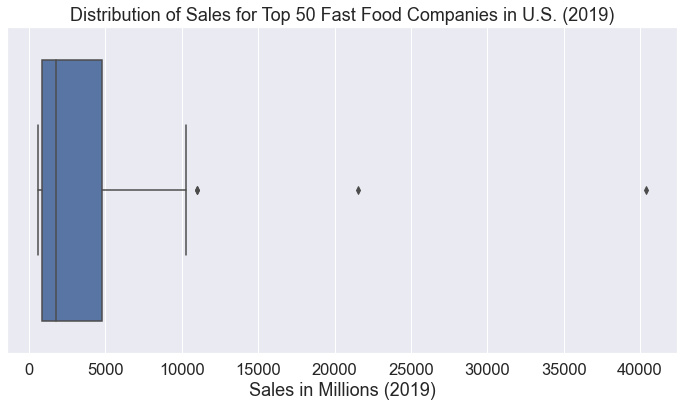

In [30]:
# press SHIFT+ENTER to run this cell and see a visualization of the describe() method above

sns.set_theme(style="darkgrid", font_scale=1.5)
plt.figure(figsize=(12,6))

ax = sns.boxplot(x=df.sales_in_millions_2019)


ax.set_xlabel("Sales in Millions (2019)")
ax.set_title("Distribution of Sales for Top 50 Fast Food Companies in U.S. (2019)");

In the box plot above, the left-most line is the minimum number, the first colored section is the first quartile, the line separating the two colored sections is the median, the second colored section is the third quartile, the right-most line is the upper end of the fourth quartile, and the dots extending to the right of the graph are the outliers.  

If you'd like to read more about box plots and see additional examples, look at the Seaborn boxplot documentation here - https://seaborn.pydata.org/generated/seaborn.boxplot.html

### Question #2 - What is the distribution for the total number of units for the companies overall?

Using Question #1 as a guide, use the describe method and boxplot methods to answer the question, "What is the distribution for the total number of units for the companies overall?" The code comments will help you know what to do. Only fill in sections which say "#__TO_DO__#"

In [31]:
# Use the describe method on the total_units_2019 column to see total unit distribution

df.total_units_2019.describe

<bound method NDFrame.describe of 0     13846
1     15041
2      2500
3      7089
4      7346
5     23802
6      5852
7      9630
8      6157
9      2225
10     2580
11     7416
12     4065
13     3526
14     3359
15     4213
16     2184
17     4381
18     2499
19     2243
20     3142
21      830
22     2787
23     1830
24      904
25      733
26     1368
27      457
28     1231
29     1100
30     1667
31      746
32      354
33      577
34      480
35      730
36      890
37     1153
38      596
39      715
40      722
41     1368
42      469
43      290
44     1050
45      185
46      915
47     2524
48      834
49     1211
Name: total_units_2019, dtype: int64>

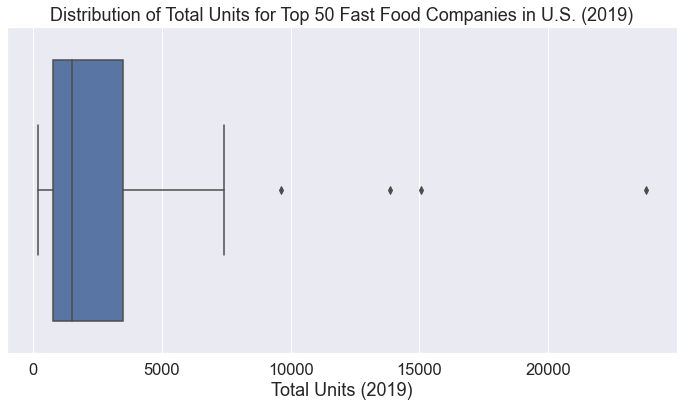

In [32]:
# make a boxplot in Seaborn to display the distribution above. Only fill in the #__TO_DO__# sections

sns.set_theme(style="darkgrid", font_scale=1.5)
plt.figure(figsize=(12,6))

ax = sns.boxplot(x=df.total_units_2019)

ax.set_xlabel("Total Units (2019)")
ax.set_title("Distribution of Total Units for Top 50 Fast Food Companies in U.S. (2019)");

Great job! You made a boxplot. Let's move on to question #3. 

### Question #3 - What companies have the most franchise units?

For this visualization, we'll use a bar graph. A bar graph displays categorical data (in this case, number of franchise units for each company). Bar graphs are different than histograms, which display numbers over time. In specializations you'll learn many more types of visualizations, including how to pick the best visualization to represent the particular data you're working with. 

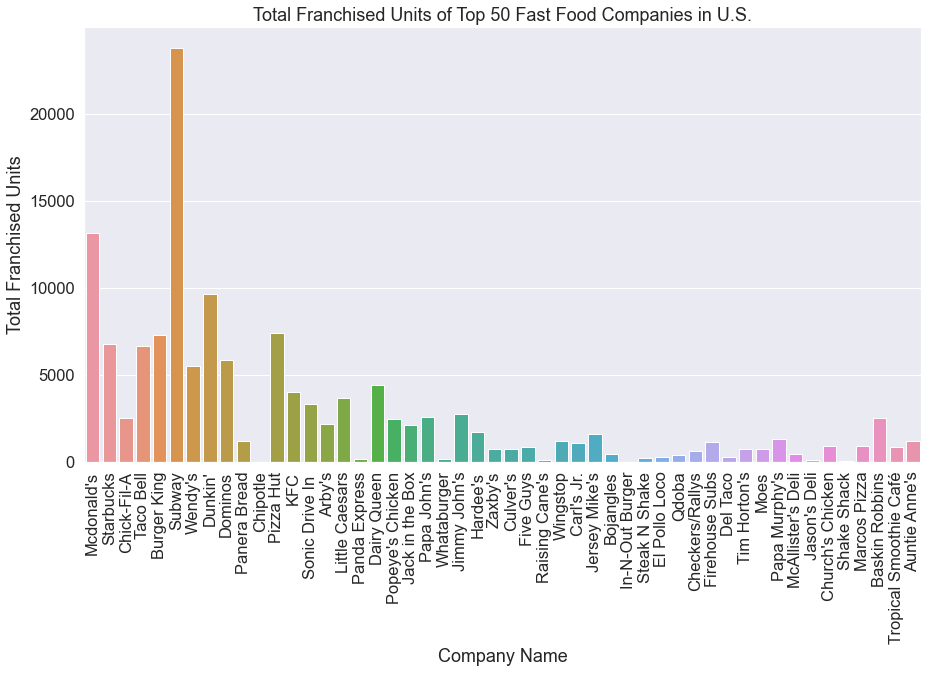

In [33]:
# press SHIFT+ENTER to run this cell

# uses seaborn (sns) and matplotlib (plt) to set graph style and size
sns.set_theme(style="darkgrid", font_scale=1.5)
plt.figure(figsize=(15,8))

# sets our visualization to variable named "ax" / sets data and x and y variables
ax = sns.barplot(data=df, x=df.company, y=df.franchised_units_2019)

# references figure variable name (ax) to change labels of x and y axis and graph title
ax.set_xlabel("Company Name")
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.set_ylabel("Total Franchised Units")
ax.set_title("Total Franchised Units of Top 50 Fast Food Companies in U.S.");

Now let's answer our question - looking at our graph above, which are the five companies with the highest number of franchise locations? Write your answers in the cell below. 

In [36]:
#__TO_DO__#

"""
The following 5 companies have the highest amount of franchised locations:

1) #Subway#
2) #McDonalds#
3) #Dunkin'#
4) #Pizza Hut#
5) #Burger King#

""";

Check your answers by running the cell below. 

In [35]:
# press SHIFT+ENTER to run this cell. 

df[['company', 'franchised_units_2019']].sort_values(by="franchised_units_2019", ascending=False).head()

,company,franchised_units_2019
5,Subway,23802
0,Mcdonald's,13154
7,Dunkin',9630
11,Pizza Hut,7393
4,Burger King,7294


We used the sort_values method from Pandas to get our answer above. To read more about this method, click here - https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.sort_values.html

#### Using the methods for Question #3, you should able to answer question #4 on your own! 

### Question #4 - Which companies have the most locations combined? 

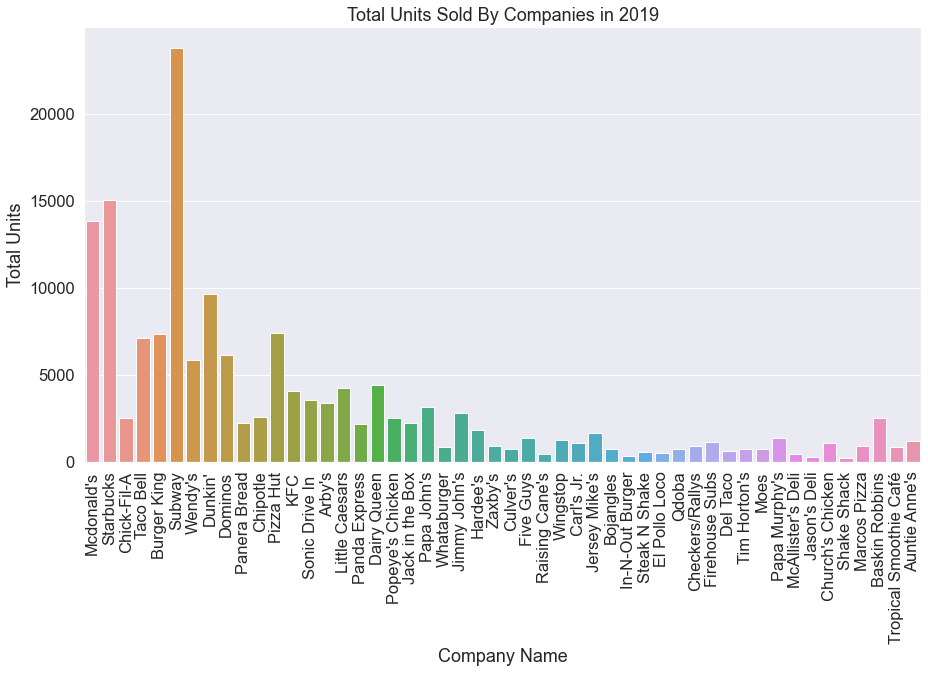

In [39]:
# make a bar graph showing the number of total units for all companies. Fill in only the #__TO_DO__# portions

# uses seaborn (sns) and matplotlib (plt) to set graph style and size
sns.set_theme(style="darkgrid", font_scale=1.5)
plt.figure(figsize=(15,8))

#__TO_DO__# - follow instructions below

# set the visualization to variable named "ax" 
# use sns.barplot 
# set data as df, and x and y variables as company and total_units_2019 column 
ax = sns.barplot(data=df, x=df.company, y=df.total_units_2019)

#__TO_DO__# - fill in #__TO_DO__# sections with appropriate titles describing the graph

ax.set_xlabel("Company Name") 
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.set_ylabel("Total Units") 
ax.set_title("Total Units Sold By Companies in 2019"); 

Using the graph above, list which companies have the highest number of total units. 

In [ ]:
#__TO_DO__#

"""
The following 5 companies have the highest amount of total unit locations:

1) #Subway#
2) #Starbucks#
3) #McDonalds#
4) #Dunkin#
5) #Pizza Hut#

""";

In [41]:
#__TO_DO__# - follow instructions below

# check your results by using the sort_values method like we did for question #3 - fill in only the #__TO_DO__# sections

df[['company', 'total_units_2019']].sort_values(by='total_units_2019', ascending=False).head() 

,company,total_units_2019
5,Subway,23802
1,Starbucks,15041
0,Mcdonald's,13846
7,Dunkin',9630
11,Pizza Hut,7416


Great job! Lastly, use these same methods to answer question #5. 

### Question #5 - Which companies have the highest revenue per unit? 

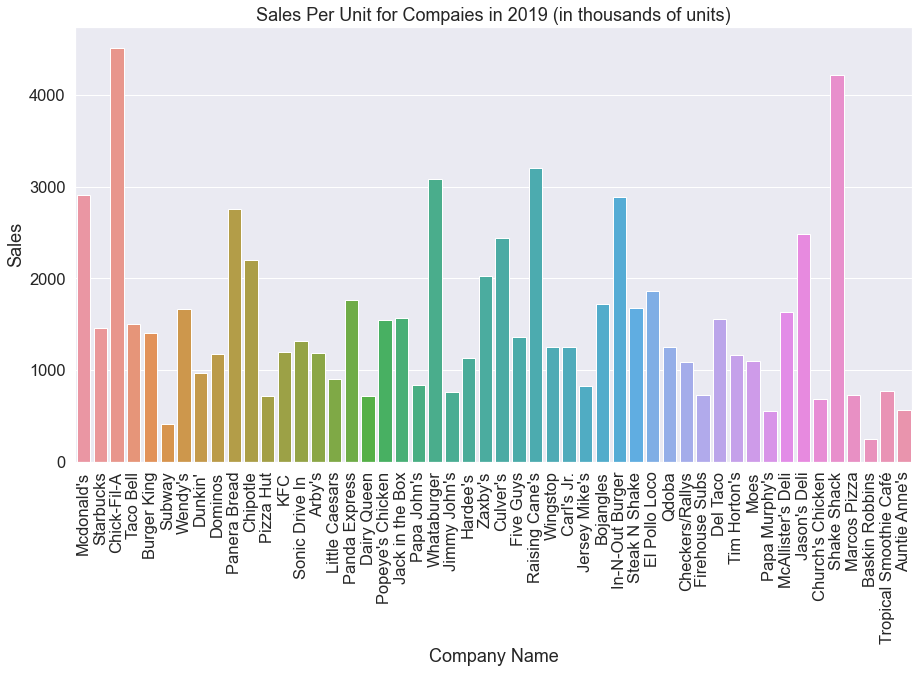

In [45]:
# make a bar graph showing the revenue per unit for all companies. Fill in only the #__TO_DO__# portions

# uses seaborn (sns) and matplotlib (plt) to set graph style and size
sns.set_theme(style="darkgrid", font_scale=1.5)
plt.figure(figsize=(15,8))

#__TO_DO__# - follow instructions below

# set the visualization to variable named "ax" 
# use sns.barplot 
# set data as df, and x and y variables as company and sales_per_unit_2019 column 

ax = sns.barplot(data=df, x=df.company, y=df.sales_per_unit_in_thousands_2019)

#__TO_DO__# - fill in #__TO_DO__# sections with appropriate titles describing the graph

ax.set_xlabel("Company Name") 
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.set_ylabel("Sales") 
ax.set_title("Sales Per Unit for Compaies in 2019 (in thousands of units)"); 

Using the graph above, list which 5 companies have the highest revenue per unit:

In [ ]:
#__TO_DO__#

"""
The following 5 companies have the highest amount of total unit locations:

1) #Chick-Fil-A#
2) #Shake Shack#
3) #Raising Cane's#
4) #Whataburger#
5) #McDonalds#

""";

Check your answers by using the sort_values method on the dataframe. 

In [50]:
# check your results by using the sort_values method like we did for question #3 - fill in only the #__TO_DO__# sections

df[['company', 'sales_per_unit_in_thousands_2019']].sort_values(by="sales_per_unit_in_thousands_2019", ascending=False).head()

,company,sales_per_unit_in_thousands_2019
2,Chick-Fil-A,4517
45,Shake Shack,4214
27,Raising Cane's,3208
21,Whataburger,3080
0,Mcdonald's,2912


Way to go! You've used data analysis and visualizations to explore a dataset and answer questions. 

For our last questions, we will be delving deeper into statistical analysis methods. You won't have to complete any of this on your own - just run the cells and read through the explanations to see the next step of what's possible in data analysis!

### Question #6 - Is there a correlation between the amount of sales per company and the company's total number of locations?

To answer this question, we will be using the "pearsonr" method, which is calculated for us using the scipy.stats python library. 

In [51]:
# imports the pearsonr method from the scipy stats library
from scipy.stats import pearsonr

The pearsonr method finds the correlation coefficient and the p-value from two continuous variables. 

For correlation, the closer the coefficient is to -1 or 1, the stronger the correlation between the two variables is. For example, -0.8 is a strong negative correlation and 0.6 is a moderate positive correlation. 

The second number is a p-value. A p-value tells you whether or not a finding is statistically significant. You don't need to know everything about how this works, just know that any p-vale under 0.05 is considered statistically significant.

In a pearsonr result, the first number is the correlation coefficient and the second number is the p-value. For example, if a pearsonr result is (-0.9, .00000126), the correlation coefficient is -0.9 and the p-value is .00000126. 

We'll run the pearsonr method in the cell below comparing the total units and sales.

In [52]:
# press SHIFT+ENTER to run the pearsonr method on the total units and total sales

pearsonr(df.total_units_2019, df.sales_in_millions_2019)

(0.716250063034081, 4.971466149570035e-09)

As you can see in our result, the correlation coefficient is 0.716 and the p-value is .00000000497 (written in scientific notation). 

Interpreting this, we can see that there is a ***moderately strong positive correlation which is statistically significant*** between a company's total units and a company's total sales. 

You can see a visualization of this correlation below with a seaborn linear regression plot. 

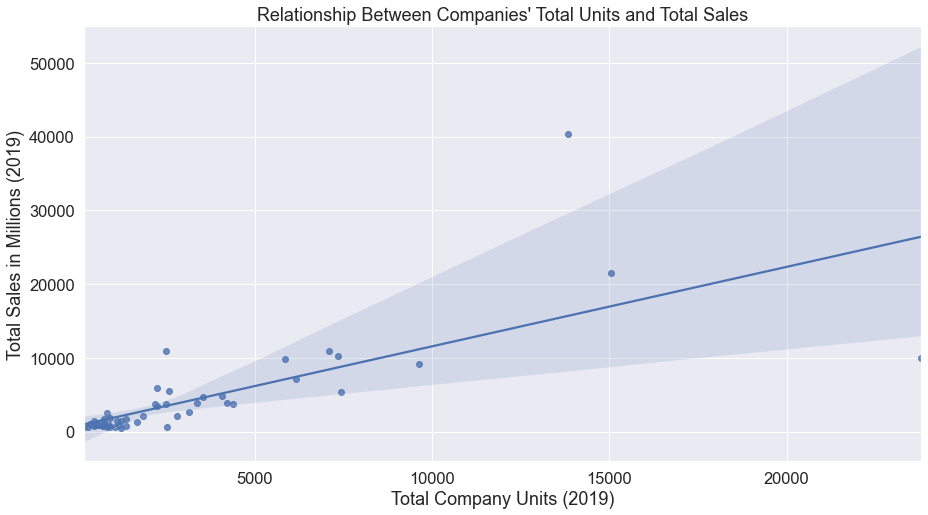

In [53]:
sns.set_theme(font_scale=1.5)
plt.figure(figsize=(15,8))

ax = sns.regplot(x=df['total_units_2019'], y=df['sales_in_millions_2019'])


ax.set_xlabel("Total Company Units (2019)")
ax.set_ylabel("Total Sales in Millions (2019)")
ax.set_title("Relationship Between Companies' Total Units and Total Sales");

## Step 5: Validate Findings

Step 5 in the data analysis lifecycle is to validate findings. In data analysis projects using forecasting, finding correlations, machine learning models, etc, it is important to run many analyses and look for vulnerabilities in the models to validate findings. 

Ronald Coase, a famous economist, said, "If you torture the data long enough, it will confess to anything."

In data analytics, we have to analyze data without changing or manipulating the meaning of it. 

This step is a check-point to make sure every step in the process was done correctly. Was the data we chose the correct data to be used to answer the questions we had? Did we clean it properly? When we manipulated the data, did we change the integrity of the dataset as a whole? Did we run our analyses correctly? Are our visualizations correct and honest? 

Part of the job of a data analyst is not only to find answers and communicate them - but to find the ***appropriate answers*** and communicate them with integrity. Even when answers might not be what your boss wants to hear - it is still important to just stick to the numbers!

## Step 6: Communicate Results

The last step in the data analysis process is communicating results. This can take many forms depending on your company and objectives. You might write reports, make slideshow presentations, put the information onto a website, or make interactive dashboards. 

Go through the links below to see examples of possible ways to communicate your findings as a data analyst:

***Data Stories gallery with Microsoft PowerBI*** - https://community.powerbi.com/t5/Data-Stories-Gallery/bd-p/DataStoriesGallery

***Business Intelligence Dashboard examples on Tableau*** - https://www.tableau.com/learn/articles/business-intelligence-dashboards-examples

***Streamlit web application - data visualization examples*** - https://streamlit.io/gallery?category=data-visualization

***DevMountain Data Analytics capstone example*** - http://stetsdata.com/ (web application with visual data analysis of US hate crime)

For further information on communicating results and storytelling with data, watch this 13 minute video on pluralsight:

#### Communicating Data through Storytelling: Executive Briefing with Jordan Morrow - 
https://app.pluralsight.com/course-player?courseId=93f0ff42-ecad-4409-9344-178c28328b01

## Further Questions

What other questions might you want to know before building your new franchise? What data would you need to gather to answer these questions? For example, you might want to know what average revenue looks like for that particular company and area, where exactly in the area would lead to the most profit, how many employees you'll need to hire in the beginning, etc.

Data Analysis is never-ending. Much of your work as an analyst will consist of questioning, analyzing, finding results, then being led to more questions based on your findings and repeating the process again. 

We hope you enjoyed the Data Analytics Specialization trial! If you have additional questions, reach out to your foundations instructor to get in touch with the Data Analytics tech lead. 